# Шаг 1. Загрузка данных. Проведение проверки и предобработки.

In [1]:
import pandas as pd

hypothesis_data = pd.read_csv('/hypothesis.csv')
orders_data = pd.read_csv('/orders.csv')
visitors_data = pd.read_csv('/visitors.csv')


hypothesis_data.head(5)



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [2]:
orders_data.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
visitors_data.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
for row in hypothesis_data.columns:
    print('Количество пропусков в столбце ', row, '=', hypothesis_data[row].isnull().sum())
print(hypothesis_data.info())    
print()
print()


for row in orders_data.columns:
    print('Количество пропусков в столбце ', row, '=', orders_data[row].isnull().sum())
print(orders_data.info())
print()
print()

for row in visitors_data.columns:
    print('Количество пропусков в столбце ', row, '=', visitors_data[row].isnull().sum())
print(visitors_data.info())

Количество пропусков в столбце  Hypothesis = 0
Количество пропусков в столбце  Reach = 0
Количество пропусков в столбце  Impact = 0
Количество пропусков в столбце  Confidence = 0
Количество пропусков в столбце  Efforts = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes
None


Количество пропусков в столбце  transactionId = 0
Количество пропусков в столбце  visitorId = 0
Количество пропусков в столбце  date = 0
Количество пропусков в столбце  revenue = 0
Количество пропусков в столбце  group = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1

## Вывод: 
    Данные не требуют дополнительной предобработки и могут быть использованы для дальнейшего проведения исследования!

# 2. Приоритезация гипотез.

# 2.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Напомним, что в фреймворке ICE используется следующая формула: ICE = Impact * Confidence / Effort

In [5]:
pd.set_option('display.max_colwidth',150)

hypothesis_data['ICE'] = hypothesis_data['Impact'] * hypothesis_data['Confidence'] / hypothesis_data['Efforts']

hypothesis_data.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


## Вывод:
    Благодаря использованию фреймворка ICE можно порекомендовать воплощение в реальность следующие гипотезы:
    
        1. Запустить акцию, дающую скидку на товар в день рождения (16.2)
        2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13)
        3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.2)
        
    

# 2.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis_data['RICE'] = hypothesis_data['Reach'] * hypothesis_data['Impact'] * hypothesis_data['Confidence'] / hypothesis_data['Efforts']

hypothesis_data.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


## Вывод:

    Благодаря использованию фреймворка RICE можно порекомендовать воплощение в реальность следующие гипотезы:
        1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112)
        2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56)
        3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40) и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40)


# Общие выводы:
    
    Как можно заметить, при использовании различных фреймворков были получены несколько отличные результаты по первому пункту (Запустить акцию, дающую скидку на товар в день рождения). Подобное искажениие может быть  получено из-за того, что в фреймворке ICE не учитывается параметр Reach (показатель охвата пользователей).
    Низкие охваты данной гипотезы могут быть объяснены одной из следующих причин:
        * Пользователи не указывают точную дату рождения при регистрации - у компании нет  необходимых данных.
        * Дни рождения пользователей "распределены" в году неравномерно, что не может давать высокую гарантию повышения прибыли в течении длительного времени.
        
    Учитывая, что фреймворк RICE использует большее количество параметров, рекомендуется использовать именно его результаты и рассмотреть вопрос о воплозении в реальность следующих  гипотез:
        1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
        2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
        3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

# 3.  Анализ A/B-теста

## 3.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [7]:
import numpy  as np
import datetime as dt
import matplotlib.pyplot as plt

orders_data.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors_data.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
datesGroups = orders_data[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors_data[np.logical_and(visitors_data['date'] <= x['date'], visitors_data['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


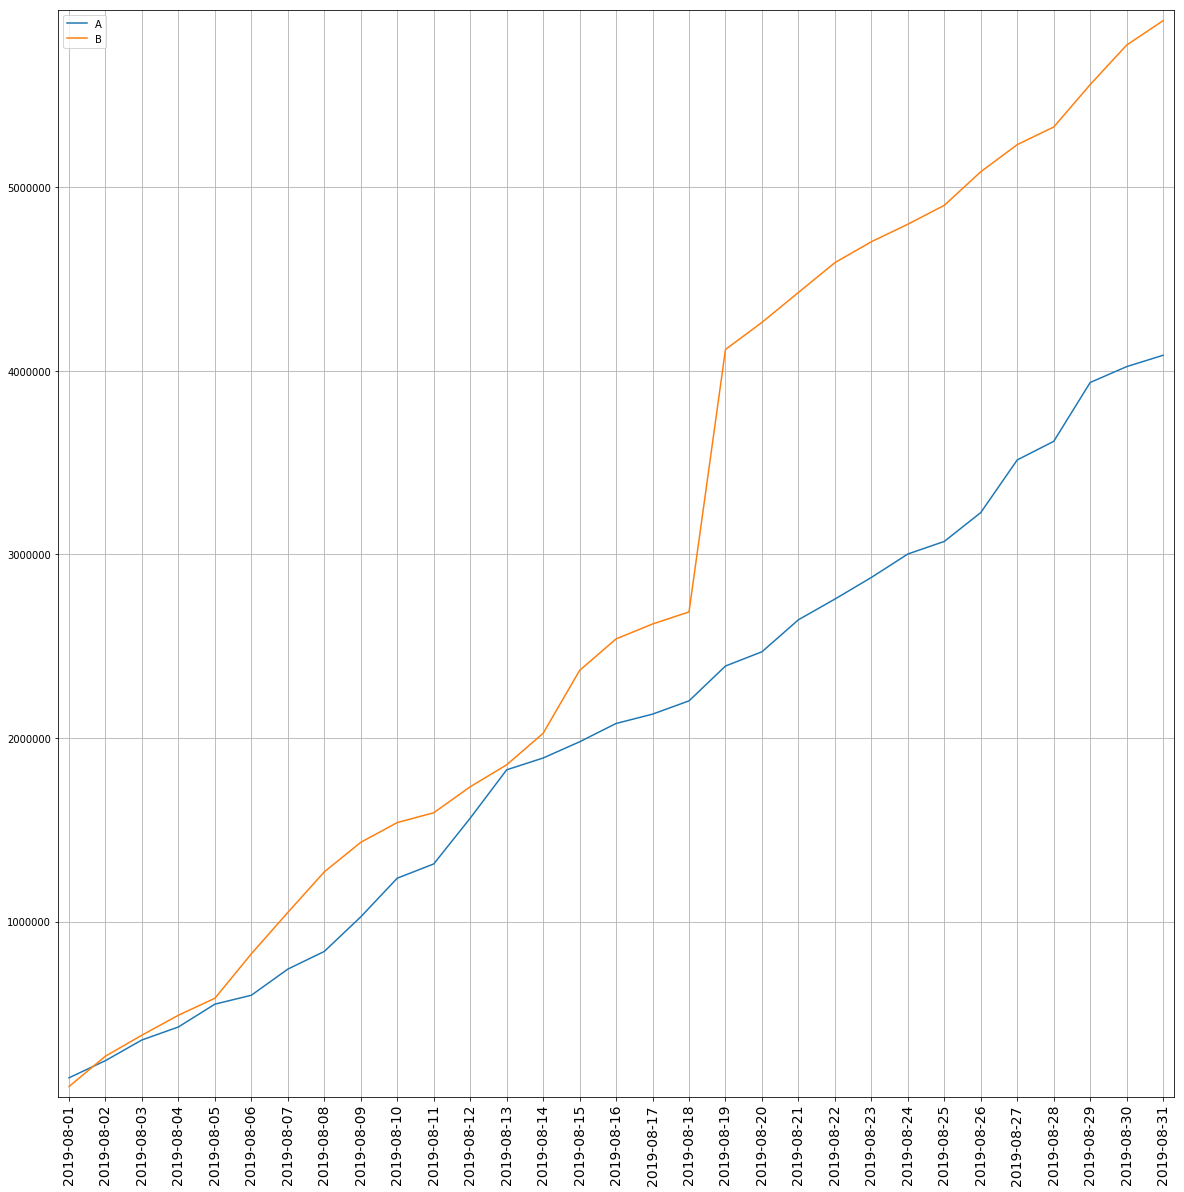

In [10]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(20,20))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()

## Вывод: 
    
    График кумулятивной выруски показывает,что группа В показывает более высокую выручку. Тем не менее, данные результаты нельзя интерпретировать однозначно, так как с 18-08 отмечается резкий скачок выручки в группе В. Возможно, это связано с появлением "китов" - клиентов с аномально высокой стомостью заказа. 
    
    Таким образом, целесообразно продолжить исследование результатов А/Б тестирования.

# 3.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

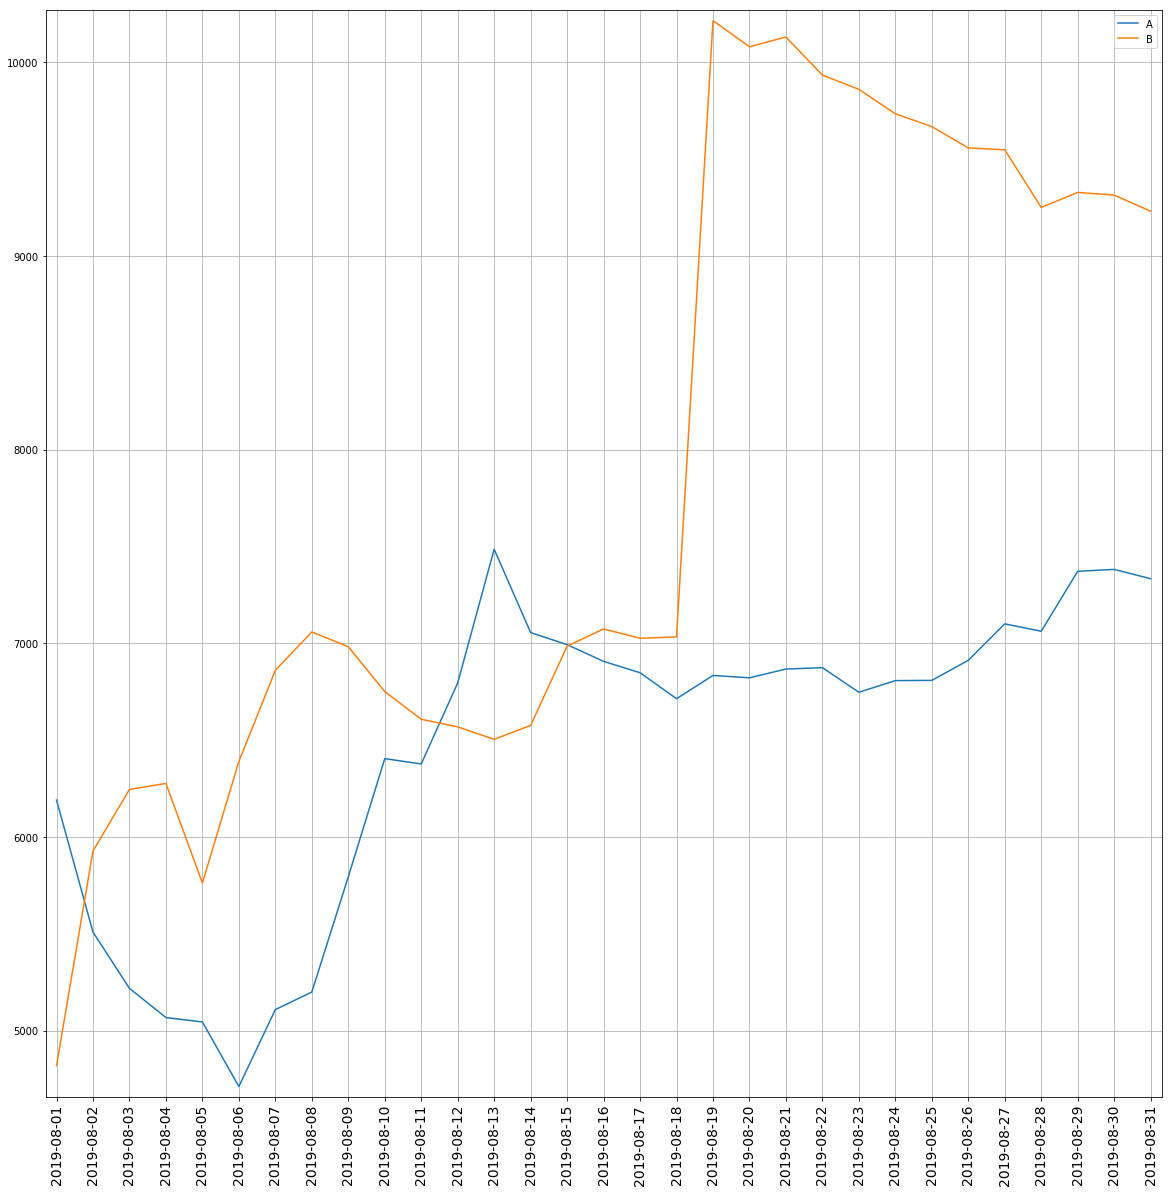

In [11]:
plt.figure(figsize = (20, 20))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')

plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')

plt.legend()

## Вывод:

    При анализе графика кумулятивного среднего чека по группам мы можем отметить, что график начал  "стабилизироваться" к 18-08, однако после этой даты отмечаются сильные искажения. На данном этапе рекомендуется продолжить А\Б тестирование, чтобы получить более точные данные!

# 3.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

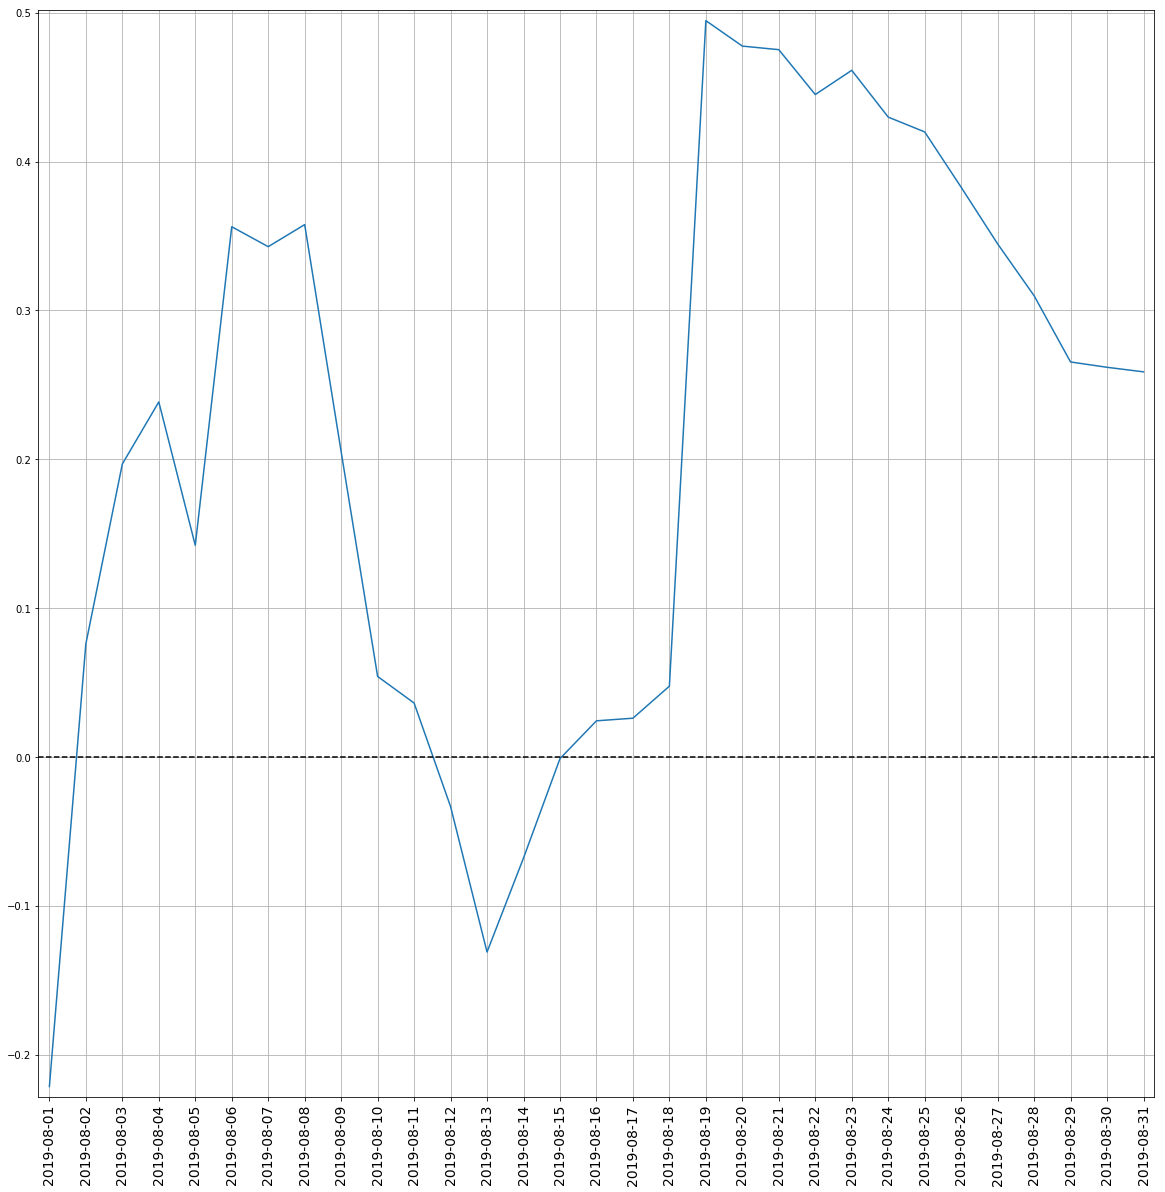

In [12]:
mergedCummulativeRevenue = cummulativeRevenueA\
                                                .merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (20, 20))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

## Вывод:

    Согласно полученным данным, средний чек существенно возрастает после 19-08. Таким образом, мы получаем подтверждение того, что в эту дату были сделаны аномально крупные заказы, которые существенно искажают результаты А\Б тестирования.

# 3.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

['2019-08-01', '2019-08-31', 0.025, 0.04]

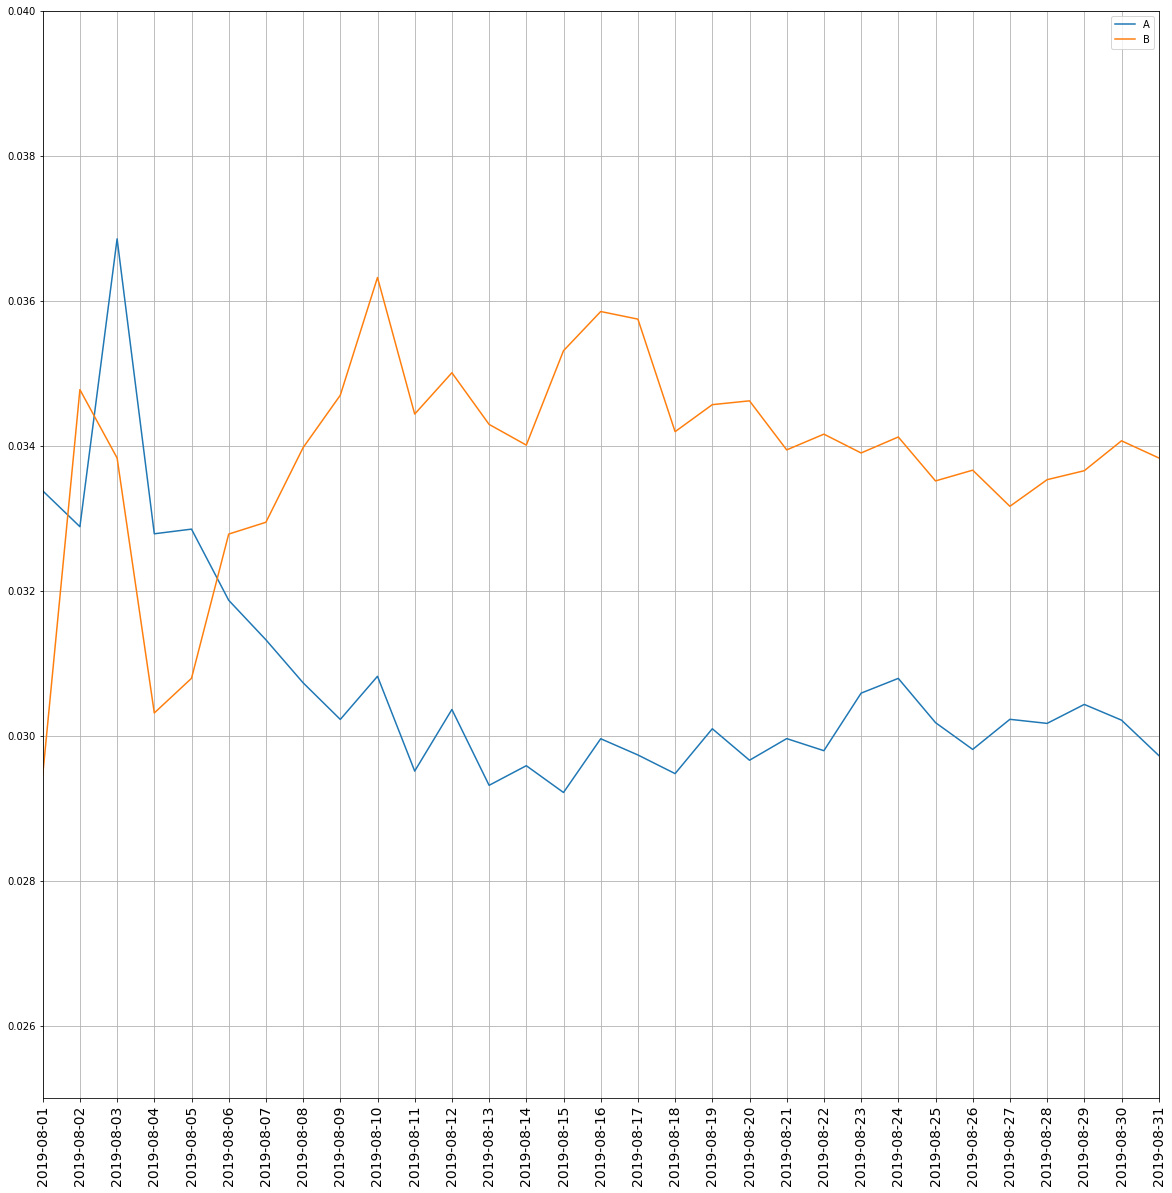

In [13]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.figure(figsize = (20, 20))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()


# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.04])

## Вывод:

    При анализе кумулятивной конверсии мы отмечаем, что конверсия группы Б на 0.4% выше, чем группы А.

# 3.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

['2019-08-01', '2019-08-31', -0.2, 0.3]

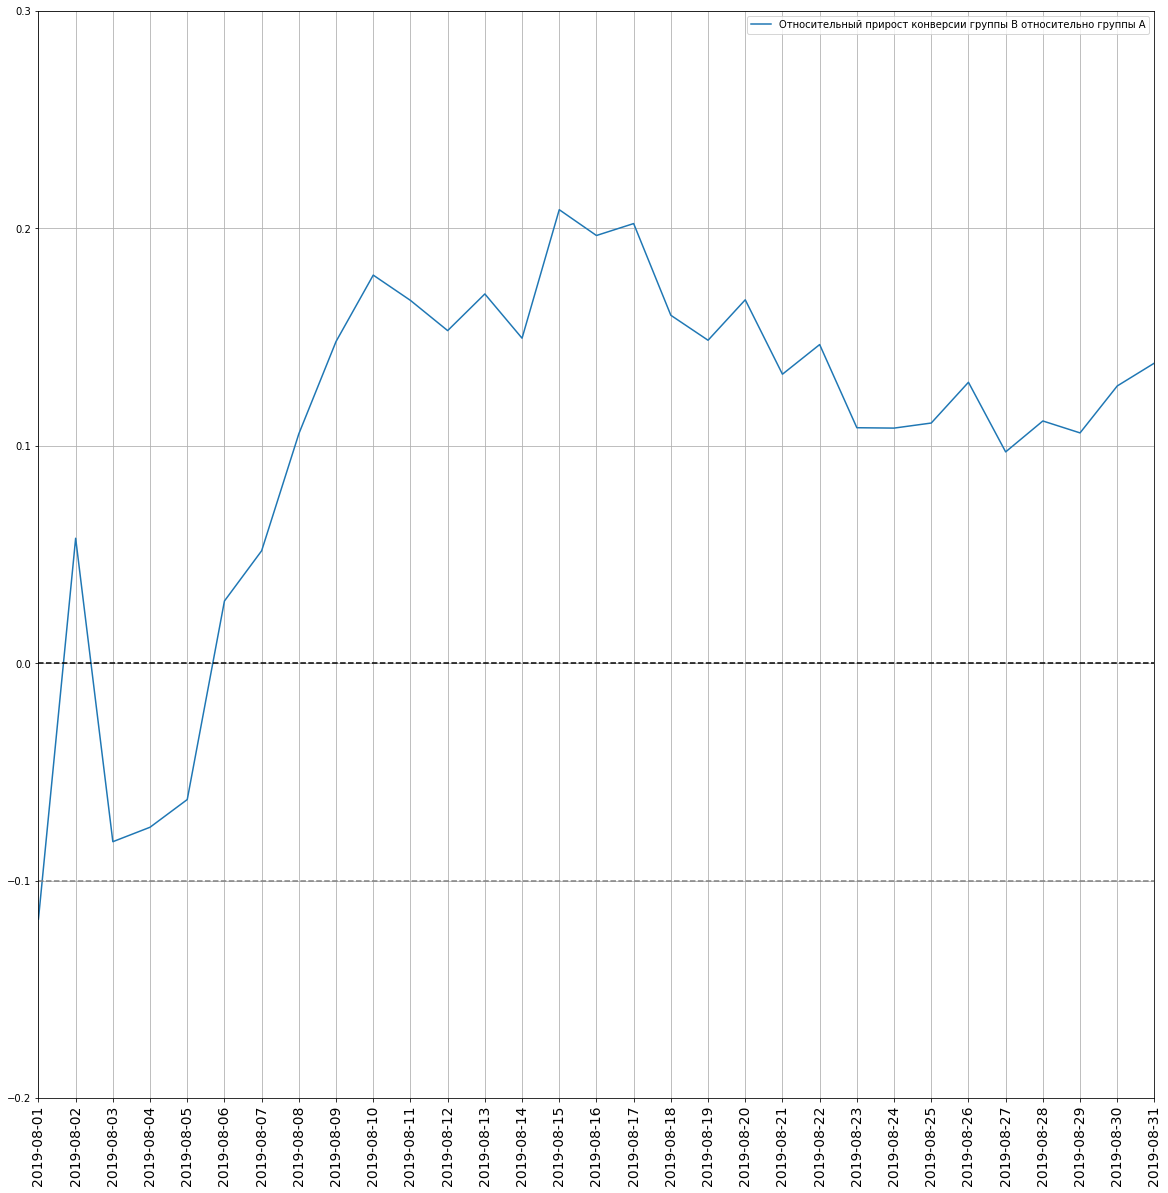

In [14]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (20, 20))
plt.xticks(fontsize=14, rotation='vertical')
plt.margins(0.01)
plt.grid(True)

plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])

## Вывод:

    После 08-06 кумулятивная конверсия группы Б стала выше, чем группы А. Тем не менее, в группе Б имеются колебания, которые невозможно интерпретировать однозначно. 

# 3.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [15]:
ordersByUsers = orders_data.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

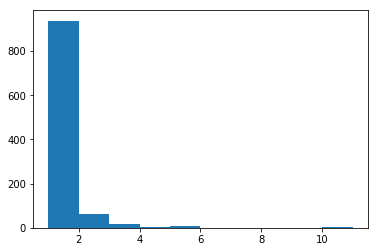

In [16]:
plt.hist(ordersByUsers['orders'])


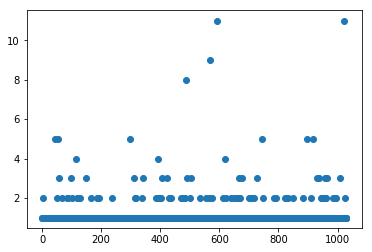

In [17]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

## Вывод:

    Графики количества заказов по пользователям показывают, что большинство клиентов выполнили один заказ за период проведения тестирования. Тем не менее, все еще остается достаточно большое число  клиентов, которые совершили два и более заказов.
    
    Для определения количества заказов, которые будем считать за аномалию, определим 95- и 99- перцентили. 

# 3.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [18]:
import numpy as np

np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

## Вывод:

    Учитывая, что лишь 5% пользователей совершали более двух заказов, то будем считать "аномалиями" всех клиентов, которые совершили более 2 заказов за отчетный период.

# 3.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

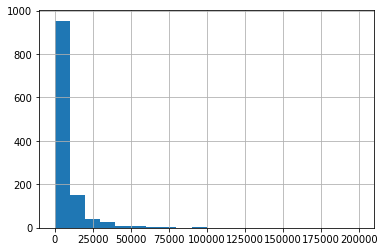

In [19]:
orders_data['revenue'].hist(bins = 20, range = (0, 200000))

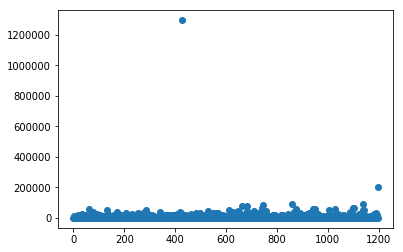

In [20]:
x_values = pd.Series(range(0,len(orders_data['revenue'])))

plt.scatter(x_values, orders_data['revenue'])

## Вывод:

    Как мы можемзаметить, стоимость большинства заказов составляет до 15 тыс. рублей, однако существуют и заказы, стоимость которых превышает 25 тыс. рублей. Для более точного определеня границы аномалии выполним определение 95 и 99 перцентилей.

# 3.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [21]:
np.percentile(orders_data['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

## Вывод: 

    Лишь 5% пользователей совершили заказы, стоимость которых превышает 28 тыс. Определим это число как границу аномально высокой стоимости заказов.

# 3.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [22]:
import scipy.stats as stats

visitorsADaily = visitors_data[visitors_data['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors_data[visitors_data['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders_data[orders_data['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders_data[orders_data['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']



In [23]:
report_data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

report_data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [24]:
ordersByUsersA = orders_data[orders_data['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_data[orders_data['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(report_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(report_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print('Нулевая гипотеза: Средняя конверсия между группам А и Б равны!')
print()
print('p-value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
alpha = 0.05
if ((stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print()
print()
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))
print()
print('Группа Б имеет прирост в конверсии.')



Нулевая гипотеза: Средняя конверсия между группам А и Б равны!

p-value =  0.008

Отвергаем нулевую гипотезу



0.138

Группа Б имеет прирост в конверсии.


## Вывод:

    При анализе "сырых" данных, группа Б  показала большую конверсию, чем группа А. Преимущество конверсии  группы Б составляет 13%. 
    
    Тем не менее, не рекомендуется использовать данные результаты как абсолют, так как данные не были очищены от выбросов!

# 3.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [25]:
print('Нулевая гипотеза: Средний чек в группах А и Б равны!')
print()
print('p-value = ', "{0:.3f}".format(stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]))
print()

alpha = 0.05
if ((stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print()
print()
print("{0:.3f}".format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1))
print()
print('Группа Б имеет прирост среднего чека.')






Нулевая гипотеза: Средний чек в группах А и Б равны!

p-value =  0.365

Не получилось отвергнуть нулевую гипотезу



0.259

Группа Б имеет прирост среднего чека.


## Вывод:

    P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A (на 25.9%).

# 3.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [26]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(report_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(report_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print('Нулевая гипотеза: Средняя конверсия между группам А и Б равны!')
print()
print('p-value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
alpha = 0.05
if ((stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print()
print()
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print()
print('Группа Б имеет прирост в конверсии.')

Нулевая гипотеза: Средняя конверсия между группам А и Б равны!

p-value =  0.007

Отвергаем нулевую гипотезу



0.173

Группа Б имеет прирост в конверсии.


## Вывод:

    После очистки результатов от аномальных клиентов (более 2 заказов и сумма заказа более 28 000 рублей), мы отвергаем нулевую гипотезу о том, что средняя конверся между группами А и Б равны. 
    
    Группа Б имеет прирост в конверсии 17%. 

# 3.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

In [27]:
print('Нулевая гипотеза: Средний чек между группам А и Б равны!')
print()

alpha = 0.05
if ((stats.mannwhitneyu(
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_data[np.logical_and(
        orders_data['group']=='B',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print()
print()
print("{0:.3f}".format(orders_data[np.logical_and(orders_data['group']=='B',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))
print()
print('Группа Б имеет падение среднего чека.')



Нулевая гипотеза: Средний чек между группам А и Б равны!

Не получилось отвергнуть нулевую гипотезу



-0.020

Группа Б имеет падение среднего чека.


## Вывод:

    Отвергнув нулевую гипотезу, мы можем утверждать, что средний чек между группами отличаются - группа Б имеет средний чек на 2% меньше, чем группа А.

# Общие выводы исследования:

    Проведя анализ А/Б тестирования, можно сделать следующие выводы:
        1. Группа Б имеет конверсию на 17%  выше, чем группа А.
        2. Группа Б имеет средний чек на 2% ниже, чем группа А.
        
    Учитывая значительное повышение конверсии, следует отметить, что группа Б будет приносить большую прибыль компании.
    
    Таким образом, считаем, что:
    
    1. А/Б тестирование успешно. Необходимо остановить тест.
    2. Признать группу Б более успешной и зафиксировать ее победу.